# AI Predictive Maintenance for Machines

## Introduction

Artificial intelligence is commonly used in various spheres to automate processes, gather insights, and speed up processes. You will use Python to study an interesting use of artificial intelligence in a real-life scenario - how AI can use sensor data from an aircraft to predict which sensor needs maintenance.


## Context

We will be working with aircraft sensor data, obtained from [Github](https://github.com/Samimust/predictive-maintenance/tree/master/data). The text files contain simulated aircraft engine run-to-failure events, operational settings, and 21 sensors measurements, which are provided by Microsoft. It is assumed that the engine progressing degradation pattern is reflected in its sensor measurements.


## Use Python to open csv files

We will use the [pandas](https://pandas.pydata.org/), [matplotlib](https://matplotlib.org/) and [scikit-learn](https://scikit-learn.org/stable/) libraries to work with our dataset. Pandas is a popular Python library for data science. It offers powerful and flexible data structures to make data manipulation and analysis easier. Scikit-learn is a very useful machine learning library that provides efficient tools for predictive data analysis. Matplotlib is a Python 2D plotting library that we can use to produce high quality data visualization. It is highly usable (as you will soon find out), you can create simple and complex graphs with just a few lines of codes!

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics 
from sklearn.feature_selection import SelectFromModel, RFECV

## Dataset Description

In [2]:
# Let us load training data 
df_train = pd.read_csv(r'[Dataset]_Module11_Train_(Maintenance).csv')


The dataset contains simulated aircraft engine run-to-failure events, operational settings, and 21 sensors measurements. Now, let us actually see those records.

## Task1: Explore the training data by printing the first 10 rows

In [ ]:
#yourcodehere

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,0.025727,0.0,1.140175,0.0,0.0,0.051186,0.031436,186,0,0
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,0.023476,0.0,1.140175,0.0,0.0,0.086718,0.021634,185,0,0
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,0.022477,0.0,0.836660,0.0,0.0,0.086487,0.034405,184,0,0
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,0.020740,0.0,0.836660,0.0,0.0,0.077136,0.038939,183,0,0
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,0.020493,0.0,0.836660,0.0,0.0,0.062849,0.058103,182,0,0


In [ ]:
# Let us load test data 
df_test = pd.read_csv(r'[Dataset]_Module11_Test_(Maintenance).csv')
df_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69,0,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82,0,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91,0,0


## Task 2: Get statistics about the training and test set by using describe function

In [ ]:
#yourcodehere

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.0,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,0.018802,0.0,0.885173,0.0,0.0,0.094636,0.056483,107.807862,0.150259,0.227813
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.007103,0.0,0.341989,0.0,0.0,0.034867,0.020669,68.880990,0.357334,0.575358
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,0.013724,0.0,0.547723,0.0,0.0,0.070071,0.041825,51.000000,0.000000,0.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,0.018365,0.0,0.836660,0.0,0.0,0.092736,0.055555,103.000000,0.000000,0.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,0.023380,0.0,1.140175,0.0,0.0,0.117132,0.069839,155.000000,0.000000,0.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,0.065761,0.0,2.828427,0.0,0.0,0.325269,0.187313,361.000000,1.000000,2.000000


In [ ]:
df_test.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
count,100.000000,100.000000,100.000000,100.000000,100.0,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,...,100.000000,100.0,100.000000,100.0,100.0,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,130.960000,-0.000073,0.000022,100.0,5.186700e+02,642.768400,1591.824700,1410.548200,1.462000e+01,...,0.019207,0.0,0.889000,0.0,0.0,0.093899,0.057975,75.52000,0.250000,0.350000
std,29.011492,53.593479,0.002353,0.000306,0.0,1.142596e-12,0.444592,6.646293,8.626344,2.856489e-14,...,0.008033,0.0,0.307613,0.0,0.0,0.035885,0.020325,41.76497,0.435194,0.657129
min,1.000000,31.000000,-0.005900,-0.000500,100.0,5.186700e+02,641.750000,1576.930000,1389.330000,1.462000e+01,...,0.004287,0.0,0.000000,0.0,0.0,0.015166,0.018966,7.00000,0.000000,0.000000
25%,25.750000,88.750000,-0.001650,-0.000300,100.0,5.186700e+02,642.490000,1587.007500,1403.912500,1.462000e+01,...,0.013697,0.0,0.707107,0.0,0.0,0.070107,0.042731,32.75000,0.000000,0.000000
50%,50.500000,133.500000,-0.000250,0.000100,100.0,5.186700e+02,642.775000,1591.365000,1410.300000,1.462000e+01,...,0.018009,0.0,0.836660,0.0,0.0,0.088544,0.055796,86.00000,0.000000,0.000000
75%,75.250000,164.250000,0.001300,0.000300,100.0,5.186700e+02,643.025000,1597.280000,1416.922500,1.462000e+01,...,0.023288,0.0,1.140175,0.0,0.0,0.114105,0.072792,112.25000,0.250000,0.250000
max,100.000000,303.000000,0.007600,0.000500,100.0,5.186700e+02,644.030000,1607.550000,1428.420000,1.462000e+01,...,0.049270,0.0,1.483240,0.0,0.0,0.187216,0.115700,145.00000,1.000000,2.000000


In [ ]:
#Check for missing values
df_train.isnull().sum()

id           0
cycle        0
setting1     0
setting2     0
setting3     0
            ..
sd20         0
sd21         0
ttf          0
label_bnc    0
label_mcc    0
Length: 71, dtype: int64

## Data Visualization

Visualizing the data often gives us an idea about how various features are distributed and thus helps us in the analysis.

In [ ]:
features = []
for col in df_train.columns: 
    features.append(col)

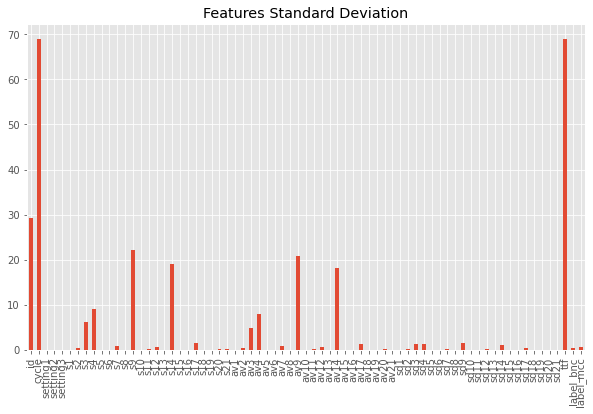

In [ ]:
#plot and compare the standard deviation of input features:
df_train[features].std().plot(kind='bar', figsize=(10,6), title="Features Standard Deviation")

Seeing correlation between features.

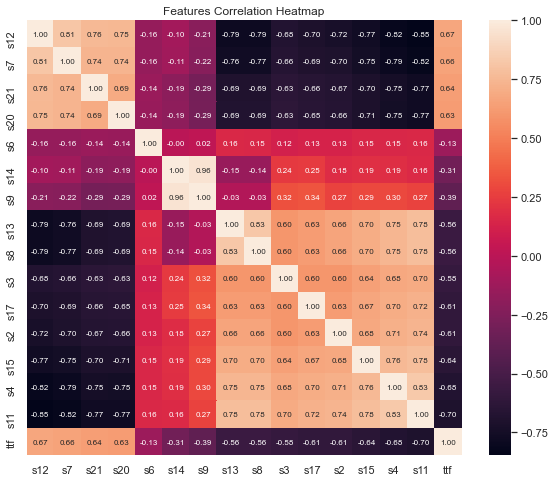

In [ ]:
#For better visualization we take feat, which is a subset of features
feat= ['s12',
 's7',
 's21',
 's20',
 's6',
 's14',
 's9',
 's13',
 's8',
 's3',
 's17',
 's2',
 's15',
 's4',
 's11',
 'ttf']

import seaborn as sns
cm = np.corrcoef(df_train[feat].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=feat, xticklabels=feat)
plt.title('Features Correlation Heatmap')
plt.show()

## Data preparation for linear regression

In [ ]:
#Let us prepare data for regression model

#These are original features
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

#These are features with low or no correlation with regression label
features_lowcr = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting1', 'setting2']

#These are features that have correlation with regression label
features_corrl = ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20','s21']

#features is a variable to hold the set of features to experiment with
features = features_orig

In [ ]:
X_train = df_train[features]
y_train = df_train['ttf']

X_test = df_test[features]
y_test = df_test['ttf']

In [ ]:
#Train test the model using features_lowcr

## Helper Functions

In [ ]:
def get_regression_metrics(model, actual, predicted):
    
    """Calculate main regression metrics.
    
    Args:
        model (str): The model name identifier
        actual (series): Contains the test label values
        predicted (series): Contains the predicted values
        
    Returns:
        dataframe: The combined metrics in single dataframe
    
    
    """
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [ ]:
def plot_features_weights(model, weights, feature_names, weights_type='c'):
    
    """Plot regression coefficients weights or feature importance.
    
    Args:
        model (str): The model name identifier
        weights (array): Contains the regression coefficients weights or feature importance
        feature_names (list): Contains the corresponding features names
        weights_type (str): 'c' for 'coefficients weights', otherwise is 'feature importance'
        
    Returns:
        plot of either regression coefficients weights or feature importance
        
    
    """
    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px,py))
    label = ' Coefficients' if weights_type =='c' else ' Features Importance'
    plt.xlabel(model + label)
    plt.gca().legend_ = None


In [ ]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    
    """Print the regression residuals.
    
    Args:
        model (str): The model name identifier
        y_train (series): The training labels
        y_train_pred (series): Predictions on training data
        y_test (series): The test labels
        y_test_pred (series): Predictions on test data
        
    Returns:
        Plot of regression residuals
    
    """
    
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

## Linear Regression Model

Linear regression is a simple model that models the relationship between a dependent variable (output) and one or more independent variables (input).

![linear regression](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-in-machine-learning.png)

RMSE

RMSE stands for root mean squared error. When we are doing predictions using our machine learning models, we need to find out if our predictions are correct. RMSE is a way of measuring the error in our predictions - if our RMSE is high, our predictions are bad and vice versa.

MAE

MAE stands for mean absolute error. Just like RMSE, MAE is a way of measuring the error in our predictions - if our MAE is high, our predictions are bad and vice versa.

In [ ]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)
linreg_metrics

R^2 training: 0.580, R^2 test: 0.405


,Linear Regression
Root Mean Squared Error,32.041095
Mean Absolute Error,25.591780
R^2,0.405495
Explained Variance,0.665297


## Task 3: Plot the weights of features obtained by linear regression

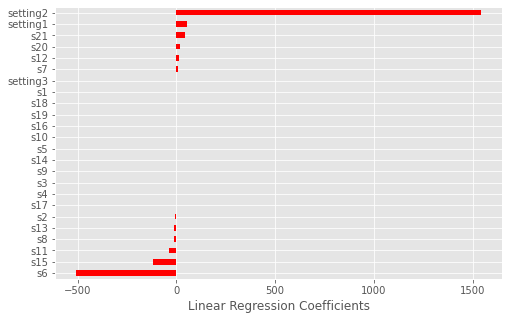

In [ ]:
#yourcodehere

The parameters of the model setting2, setting1, s1, s2 etc. are plotted here. You can see that red lines for setting2 and s6 are the longest. So, they are the most important.

## Task 4 : Plot the Residual Graph